In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IRT import AdaptiveMIRT
# from debugging import OptimizedAdaptiveMIRT
# from test_func import FastMIRT
cur1 = []
cur2 = []
cur3 = []
n_steps = 100

In [11]:
for _ in range(20):
    vanila = AdaptiveMIRT(n_items=1000, select_noise=0.05,n_traits=5, verbose=False)
    for _ in tqdm(range(n_steps), desc="Running Adaptive Testing"):
        item = vanila.next_item()
        resp = vanila.sim_resp()
        vanila.update_theta()
    cur2.append(vanila.info_gain)

Running Adaptive Testing: 100%|██████████| 100/100 [00:00<00:00, 109.31it/s]


In [34]:
300//2

150

In [35]:
import numpy as np
import time
from tqdm import tqdm
from env2 import VocRecEnv
import matplotlib.pyplot as plt
import seaborn as sns

def random_policy(n_jobs: int) -> np.ndarray:
    """Simple random policy for testing."""
    return np.random.randn(n_jobs).astype(np.float32)

def plot_results(rewards: np.ndarray, episode_times: np.ndarray, step_times: np.ndarray, show: bool = True):
    """Plot benchmark results."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot reward history
    axes[0, 0].plot(rewards, alpha=0.6)
    axes[0, 0].set_title('Reward per Episode')
    axes[0, 0].set_xlabel('Episode')
    axes[0, 0].set_ylabel('Total Reward')
    axes[0, 0].grid(True)
    
    # Plot reward distribution
    sns.histplot(rewards, kde=True, ax=axes[0, 1])
    axes[0, 1].set_title('Reward Distribution')
    axes[0, 1].set_xlabel('Reward')
    axes[0, 1].grid(True)
    
    # Plot episode time distribution
    sns.histplot(episode_times, kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Episode Runtime Distribution')
    axes[1, 0].set_xlabel('Time (seconds)')
    axes[1, 0].grid(True)
    
    # Plot step time distribution
    sns.histplot(step_times.flatten()*1000, kde=True, ax=axes[1, 1])
    axes[1, 1].set_title('Step Runtime Distribution')
    axes[1, 1].set_xlabel('Time (milliseconds)')
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.savefig('benchmark_results.png')
    if show:
        plt.show()
    else:
        plt.close()

def run_simple_benchmark(n_episodes: int = 1000, n_steps: int = 100, show_plots: bool = True):
    """Run a simple benchmark and collect runtime and reward statistics."""
    env = VocRecEnv(feedback_interval=n_steps//2)
    
    # Initialize arrays
    episode_times = np.zeros(n_episodes)
    step_times = np.zeros((n_episodes, n_steps))
    episode_rewards = np.zeros(n_episodes)
    step_rewards = np.zeros((n_episodes, n_steps))
    
    # Run episodes
    for episode in tqdm(range(n_episodes), desc="Episodes"):
        episode_start = time.time()
        env.reset()
        episode_reward = 0
        
        for step in range(n_steps):
            step_start = time.time()
            
            # Take step with random action
            action = random_policy(env.n_jobs)
            _, reward, _, _ = env.step(action)
            episode_reward += reward
            step_rewards[episode, step] = reward
            
            step_times[episode, step] = time.time() - step_start
            
        episode_times[episode] = time.time() - episode_start
        episode_rewards[episode] = episode_reward
    
    # Generate plots
    plot_results(episode_rewards, episode_times, step_times, show=show_plots)
    
    return {
        'runtime': {
            'total': np.sum(episode_times),
            'episode': {
                'mean': np.mean(episode_times),
                'std': np.std(episode_times)
            },
            'step': {
                'mean': np.mean(step_times),
                'std': np.std(step_times),
                'min': np.min(step_times),
                'max': np.max(step_times)
            }
        },
        'reward': {
            'mean': float(np.mean(episode_rewards)),
            'std': float(np.std(episode_rewards)),
            'min': float(np.min(episode_rewards)),
            'max': float(np.max(episode_rewards)),
            'per_step': {
                'mean': float(np.mean(step_rewards)),
                'std': float(np.std(step_rewards))
            }
        }
    }


Episodes: 100%|██████████| 200/200 [02:17<00:00,  1.46it/s]


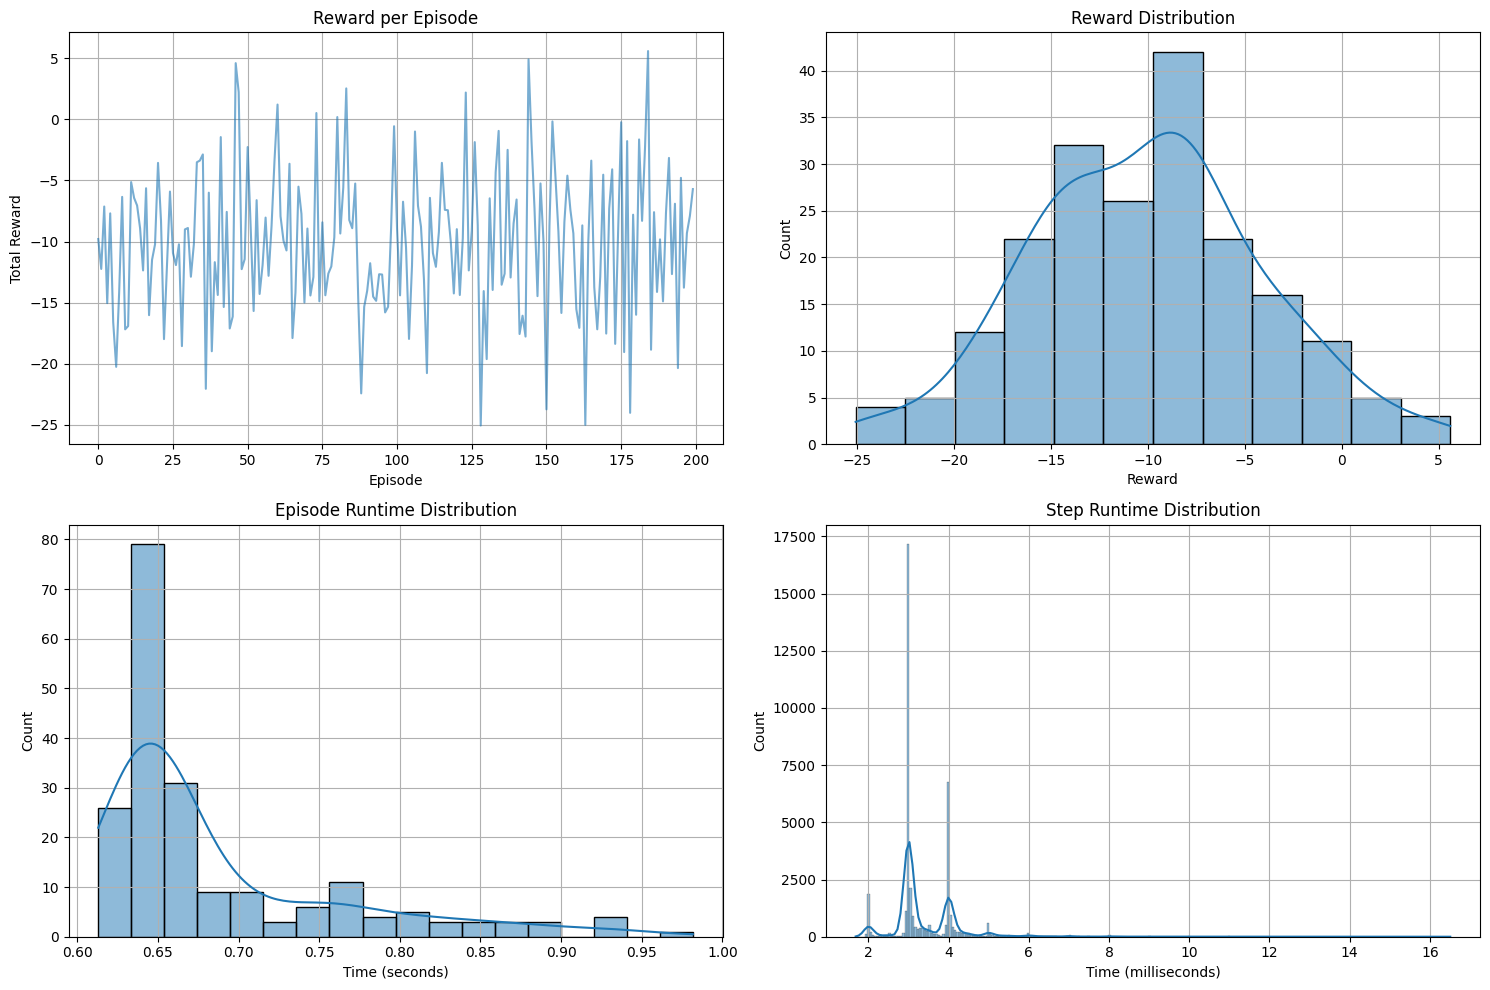


=== Runtime Statistics ===
Total Runtime: 137.30 seconds
Episodes: 0.686 ± 0.076 seconds
Steps: 3.42 ± 0.97 ms
Step Range: [1.68, 16.51] ms

=== Reward Statistics ===
Mean Reward: -10.125 ± 5.915
Reward Range: [-25.055, 5.591]


In [36]:
np.random.seed(42)

# Run benchmark
stats = run_simple_benchmark(n_episodes=200, n_steps=200)

# Print results
print("\n=== Runtime Statistics ===")
print(f"Total Runtime: {stats['runtime']['total']:.2f} seconds")
print(f"Episodes: {stats['runtime']['episode']['mean']:.3f} ± {stats['runtime']['episode']['std']:.3f} seconds")
print(f"Steps: {stats['runtime']['step']['mean']*1000:.2f} ± {stats['runtime']['step']['std']*1000:.2f} ms")
print(f"Step Range: [{stats['runtime']['step']['min']*1000:.2f}, {stats['runtime']['step']['max']*1000:.2f}] ms")

print("\n=== Reward Statistics ===")
print(f"Mean Reward: {stats['reward']['mean']:.3f} ± {stats['reward']['std']:.3f}")
print(f"Reward Range: [{stats['reward']['min']:.3f}, {stats['reward']['max']:.3f}]")

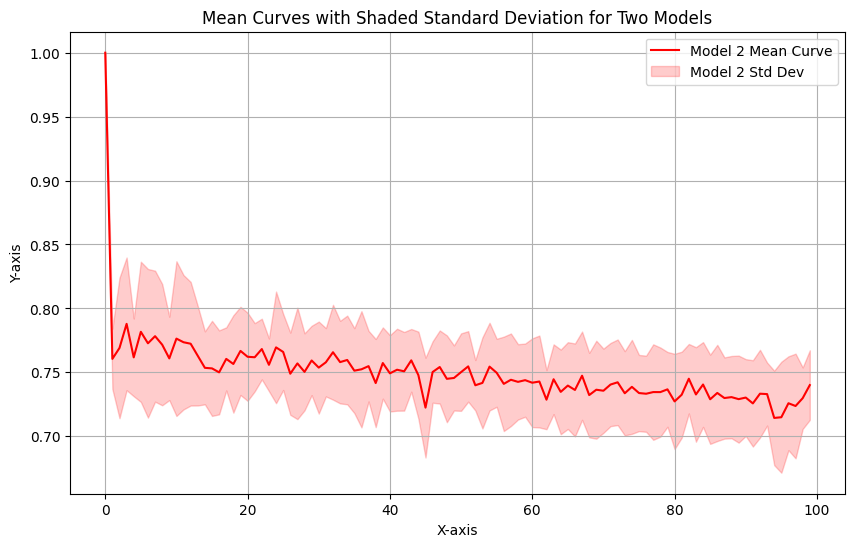

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for two models: 20 curves each of length 100 (simulated data)
n_curves = 20
n_points = 100
# data_model_1 = np.array(cur1)  # Replace with curves from Model 1
data_model_2 = np.array(cur2)  # Replace with curves from Model 2


# # Calculate the mean and standard deviation for both models
# mean_curve_1 = np.mean(data_model_1, axis=0)
# std_curve_1 = np.std(data_model_1, axis=0)

mean_curve_2 = np.mean(data_model_2, axis=0)
std_curve_2 = np.std(data_model_2, axis=0)


# Plotting the mean curves with shaded standard deviation intervals
x = np.arange(n_points)

plt.figure(figsize=(10, 6))
# plt.plot(x, mean_curve_1, label='Model 1 Mean Curve', color='blue')
# plt.fill_between(x, mean_curve_1 - std_curve_1, mean_curve_1 + std_curve_1, color='blue', alpha=0.2, label='Model 1 Std Dev')

plt.plot(x, mean_curve_2, label='Model 2 Mean Curve', color='red')
plt.fill_between(x, mean_curve_2 - std_curve_2, mean_curve_2 + std_curve_2, color='red', alpha=0.2, label='Model 2 Std Dev')

plt.title("Mean Curves with Shaded Standard Deviation for Two Models")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
vanila = AdaptiveMIRT(n_items=1000, select_noise=0.05,n_traits=5, verbose=False)
n_steps = 100
for _ in tqdm(range(n_steps), desc="Running Adaptive Testing"):
    item = vanila.next_item()
    resp = vanila.sim_resp()
    vanila.update_theta()

Running Adaptive Testing: 100%|██████████| 100/100 [00:01<00:00, 81.76it/s]


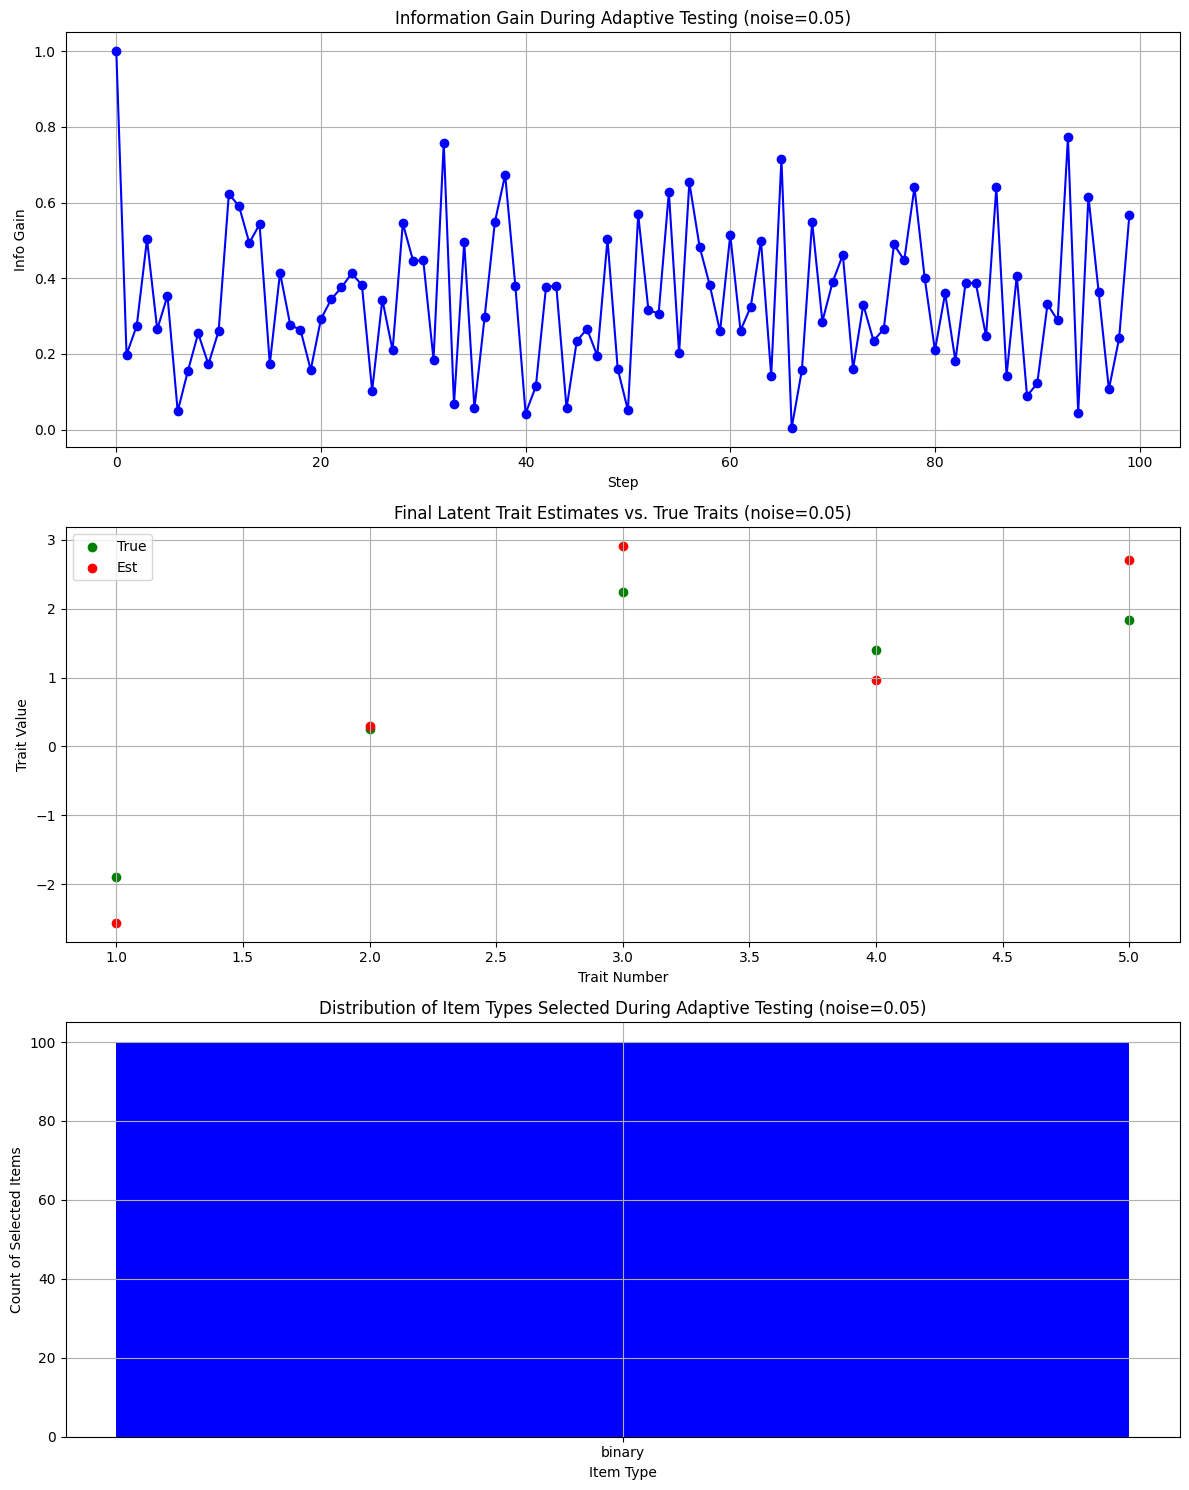

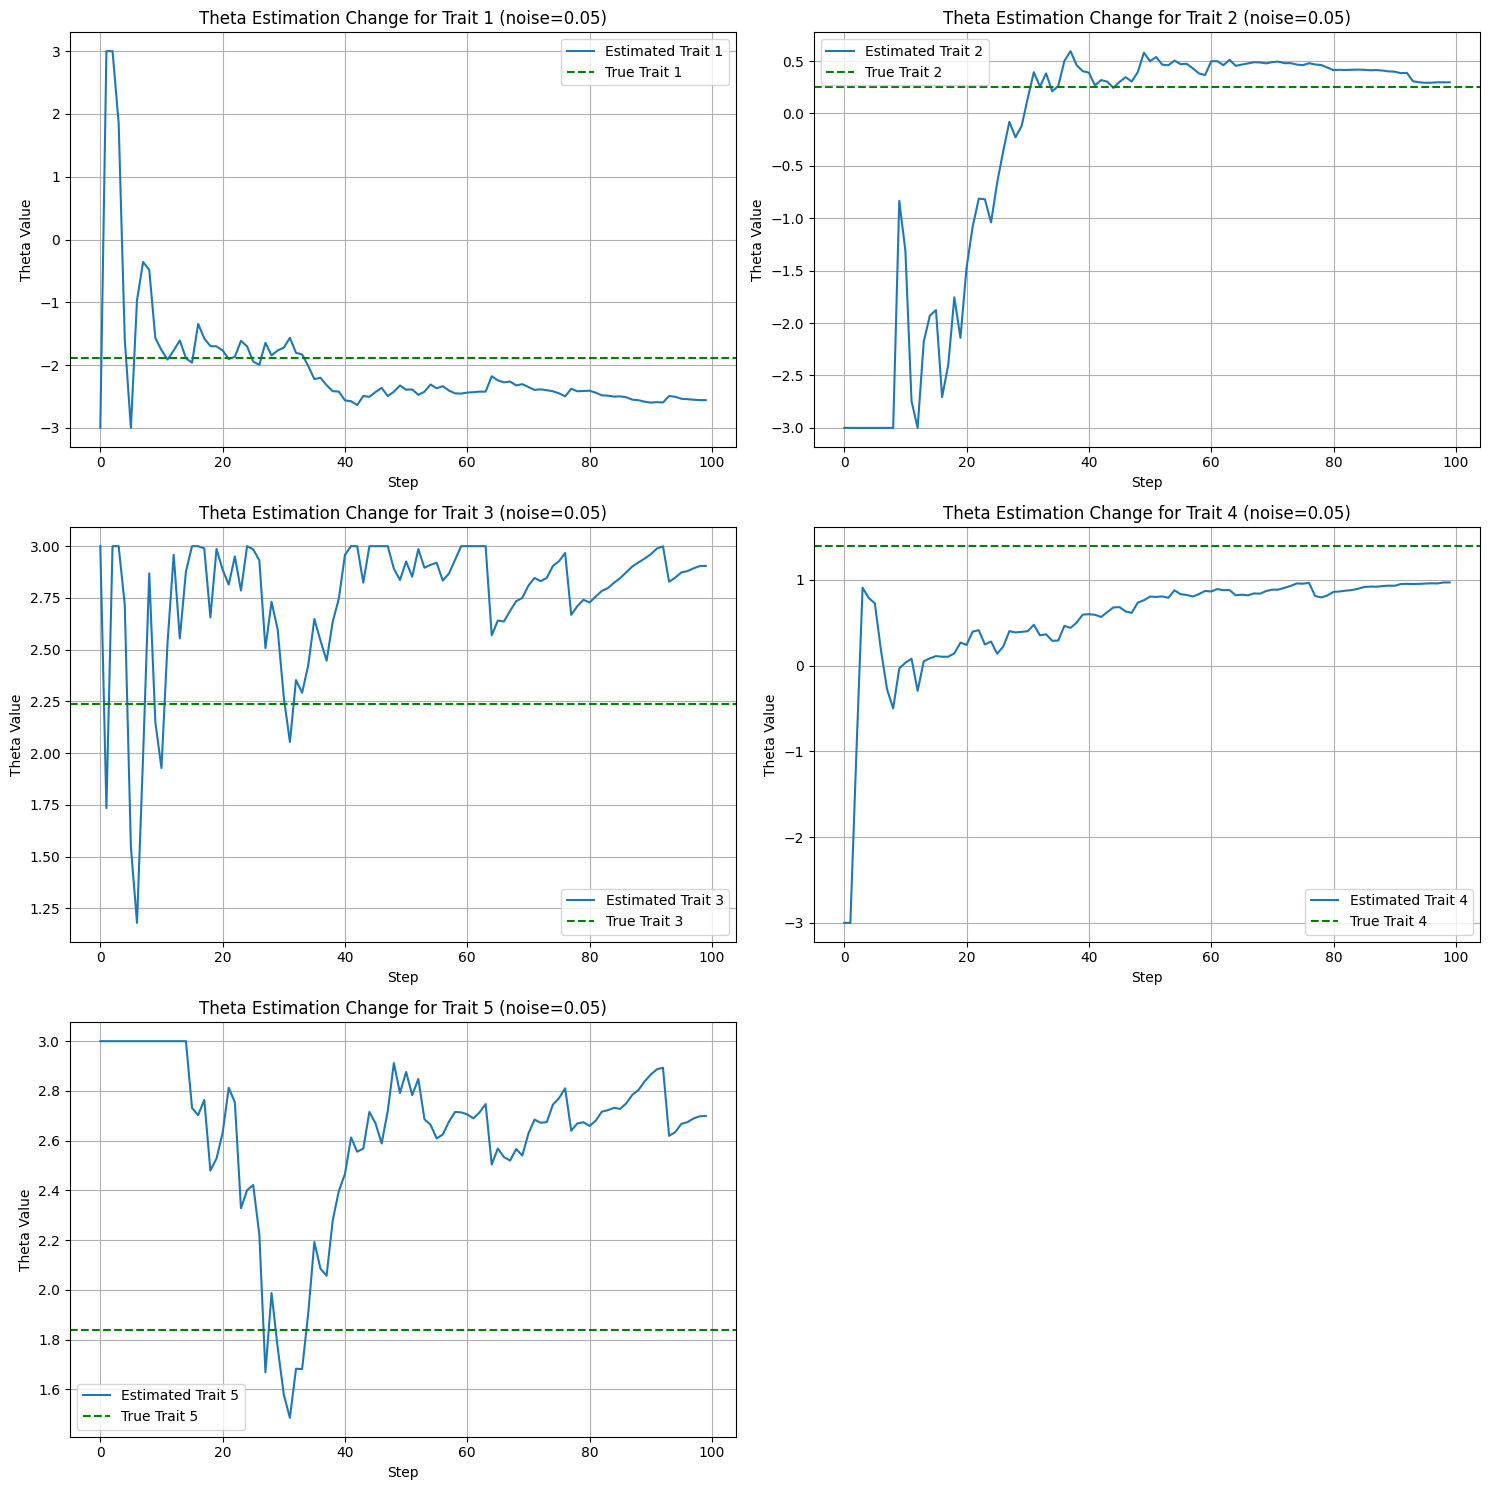

In [30]:
v2.plot_results(save_fig=False)

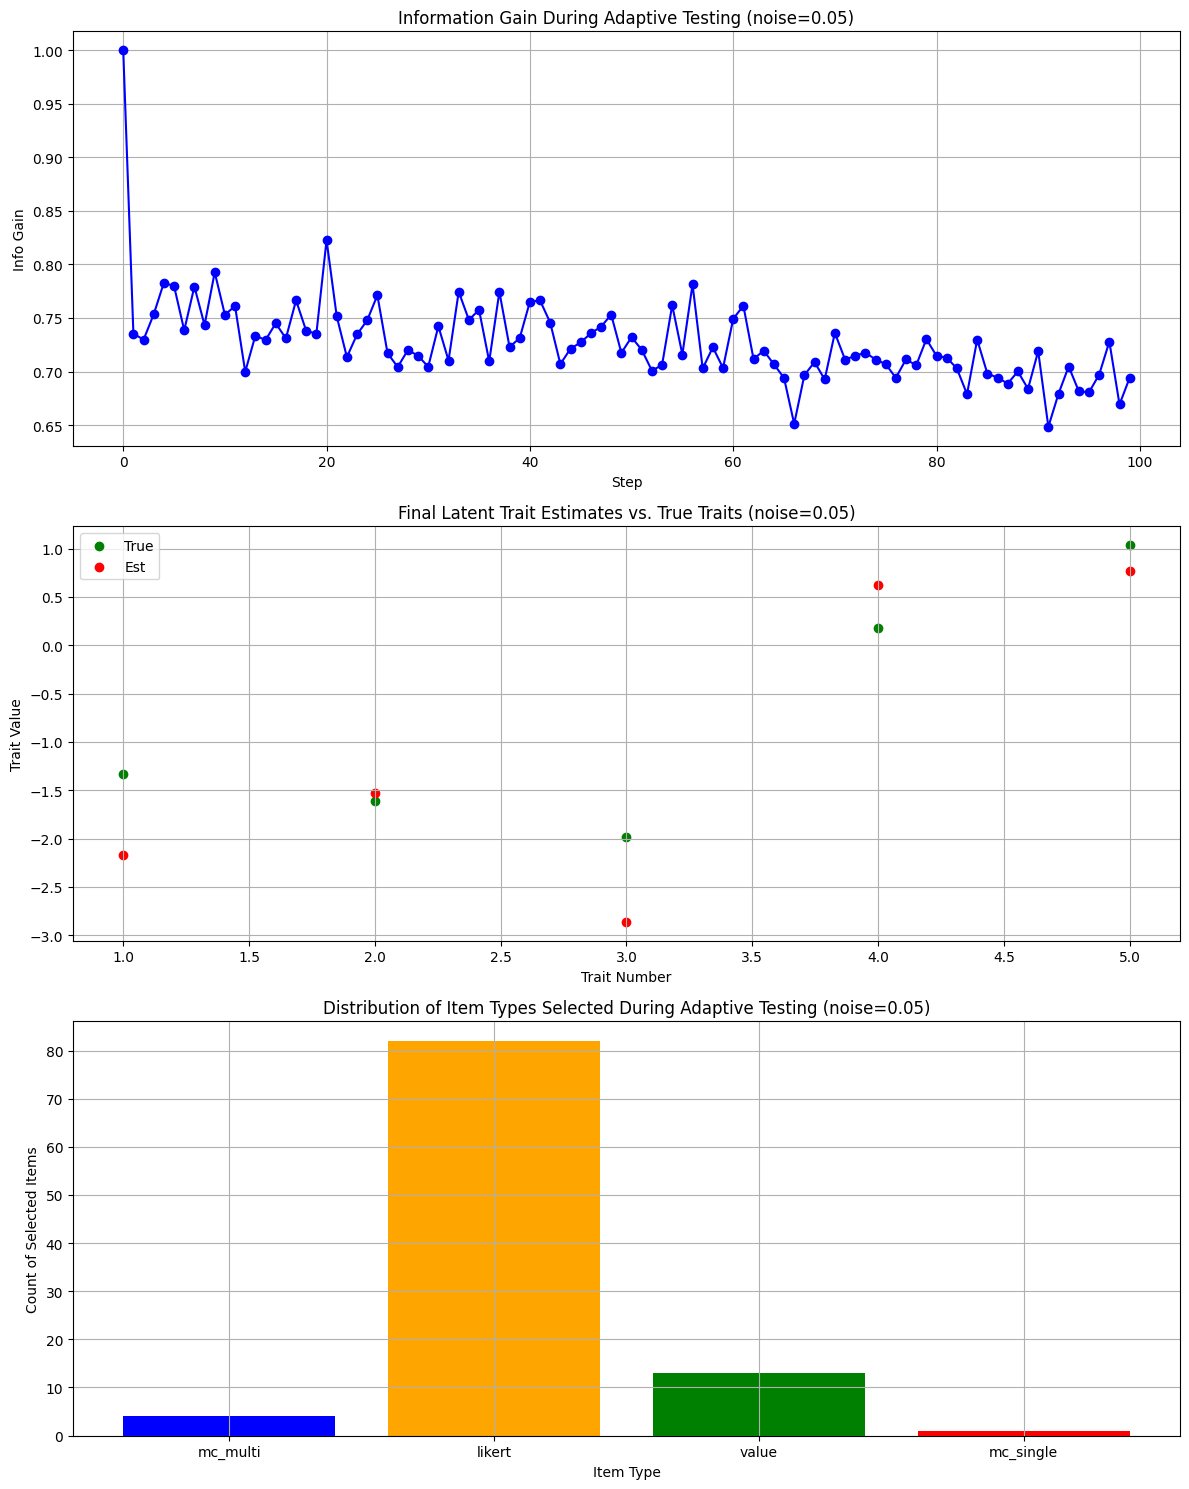

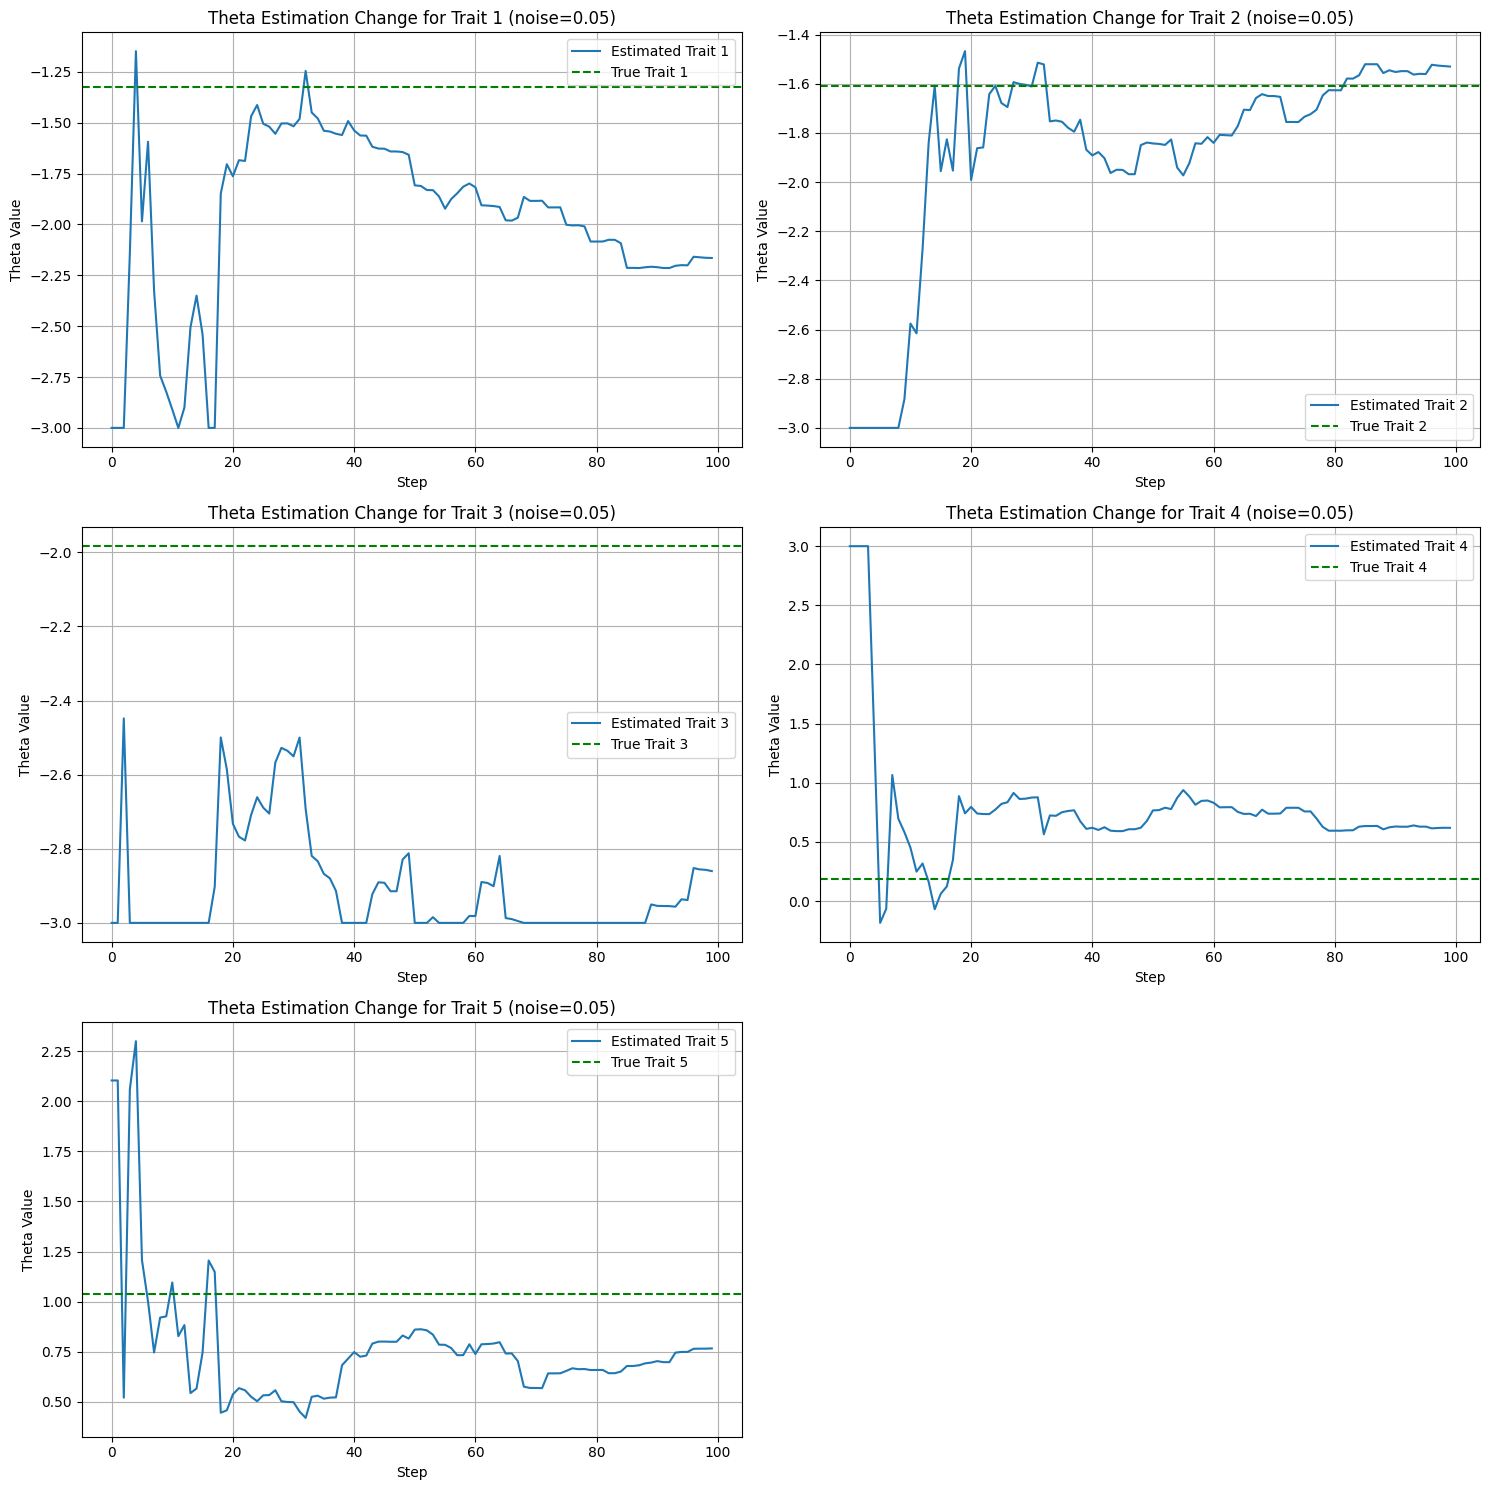

In [42]:
vanila.plot_results(save_fig=False)

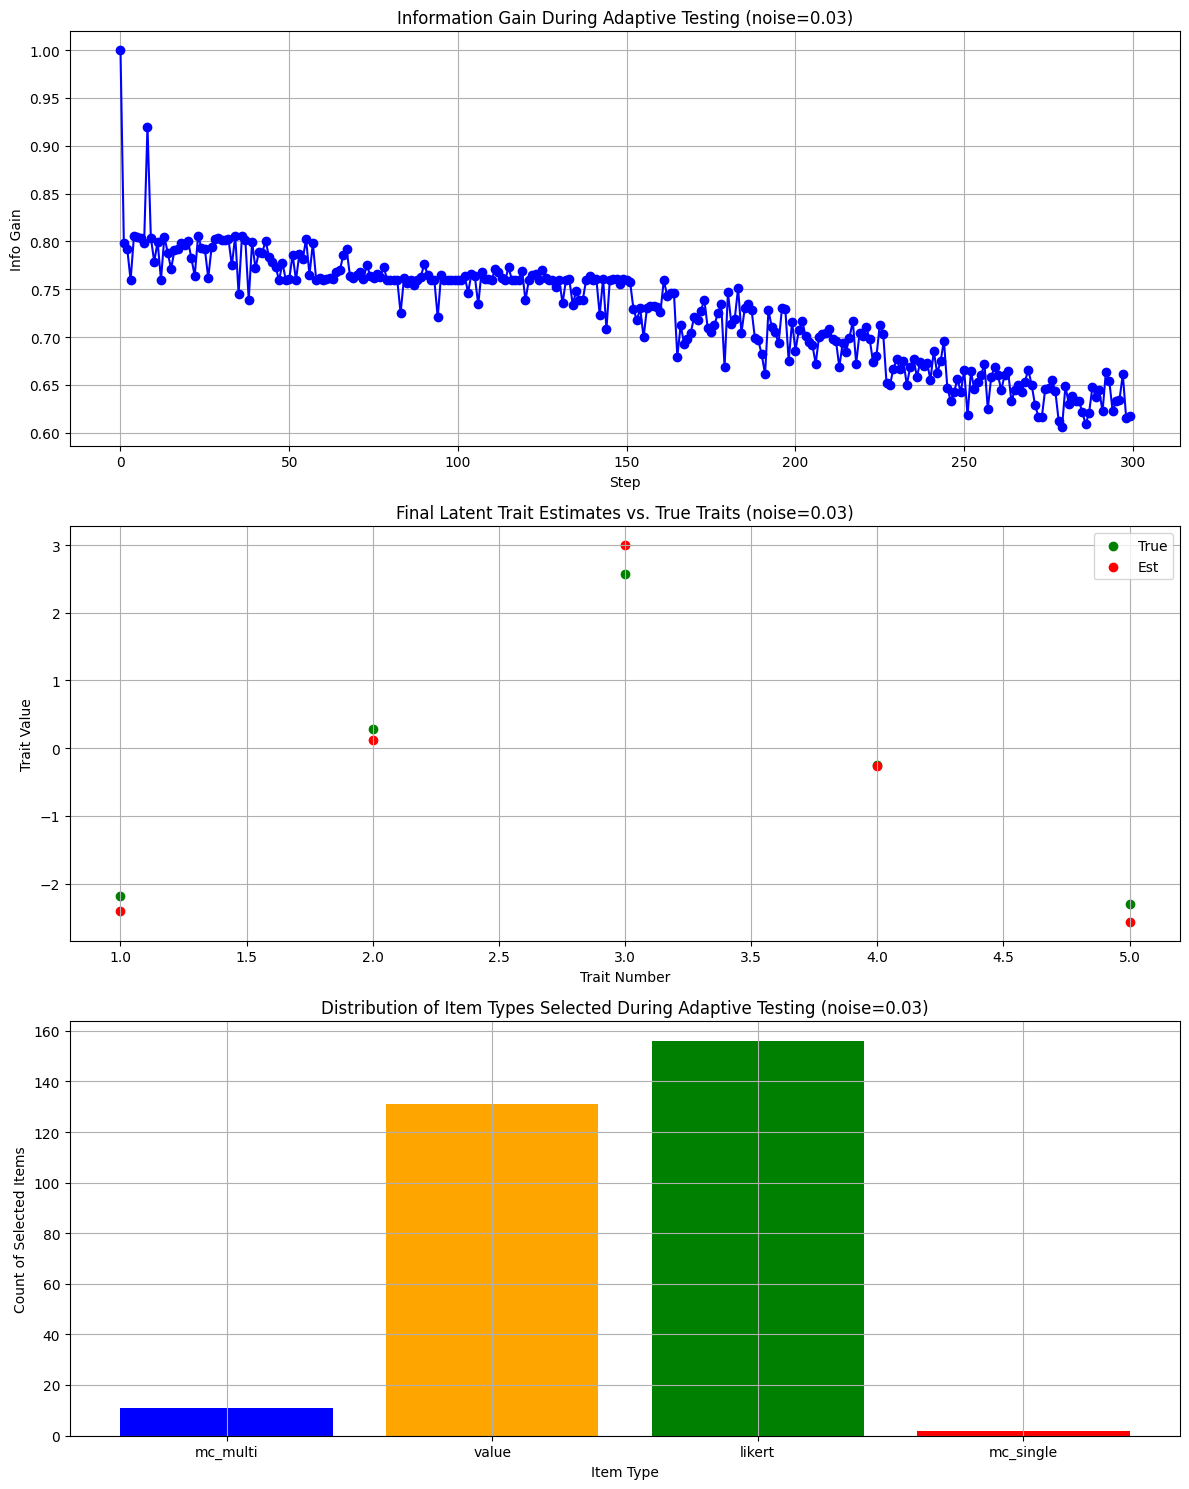

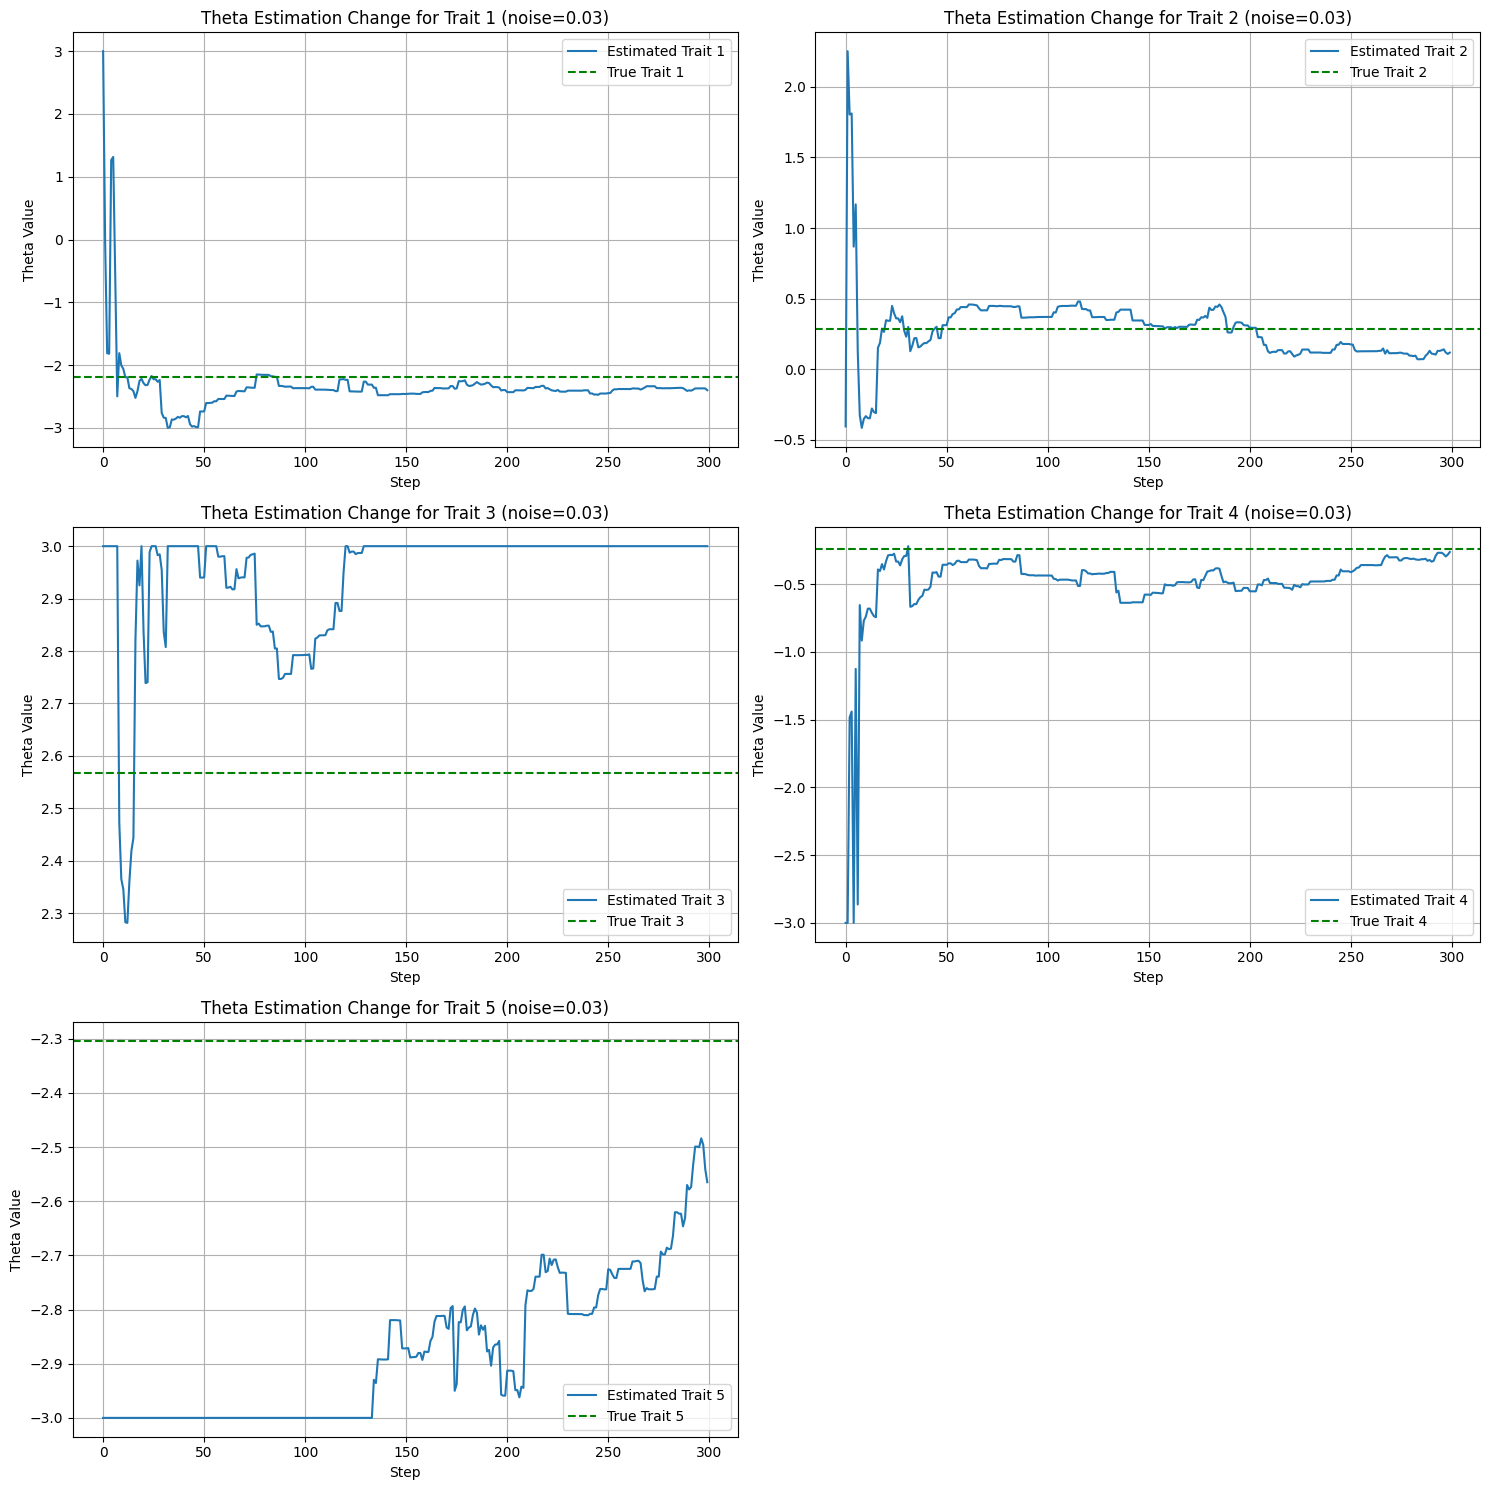

In [25]:
model.plot_results(save_fig=False)

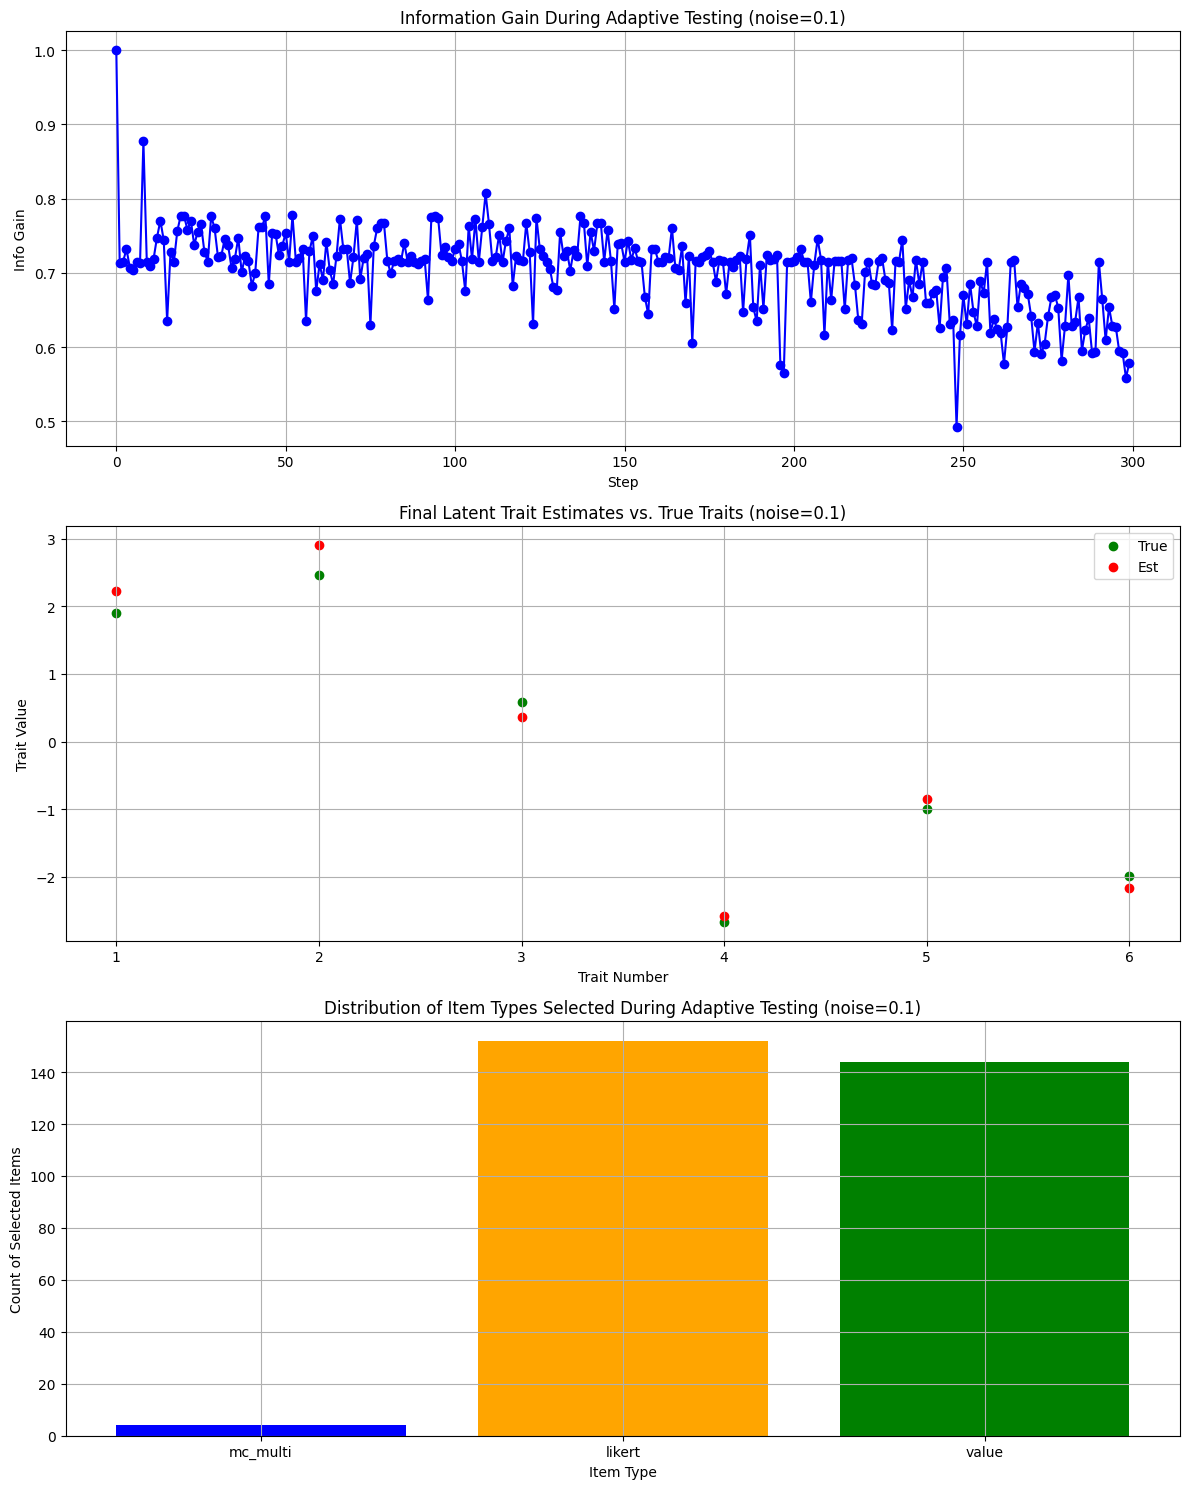

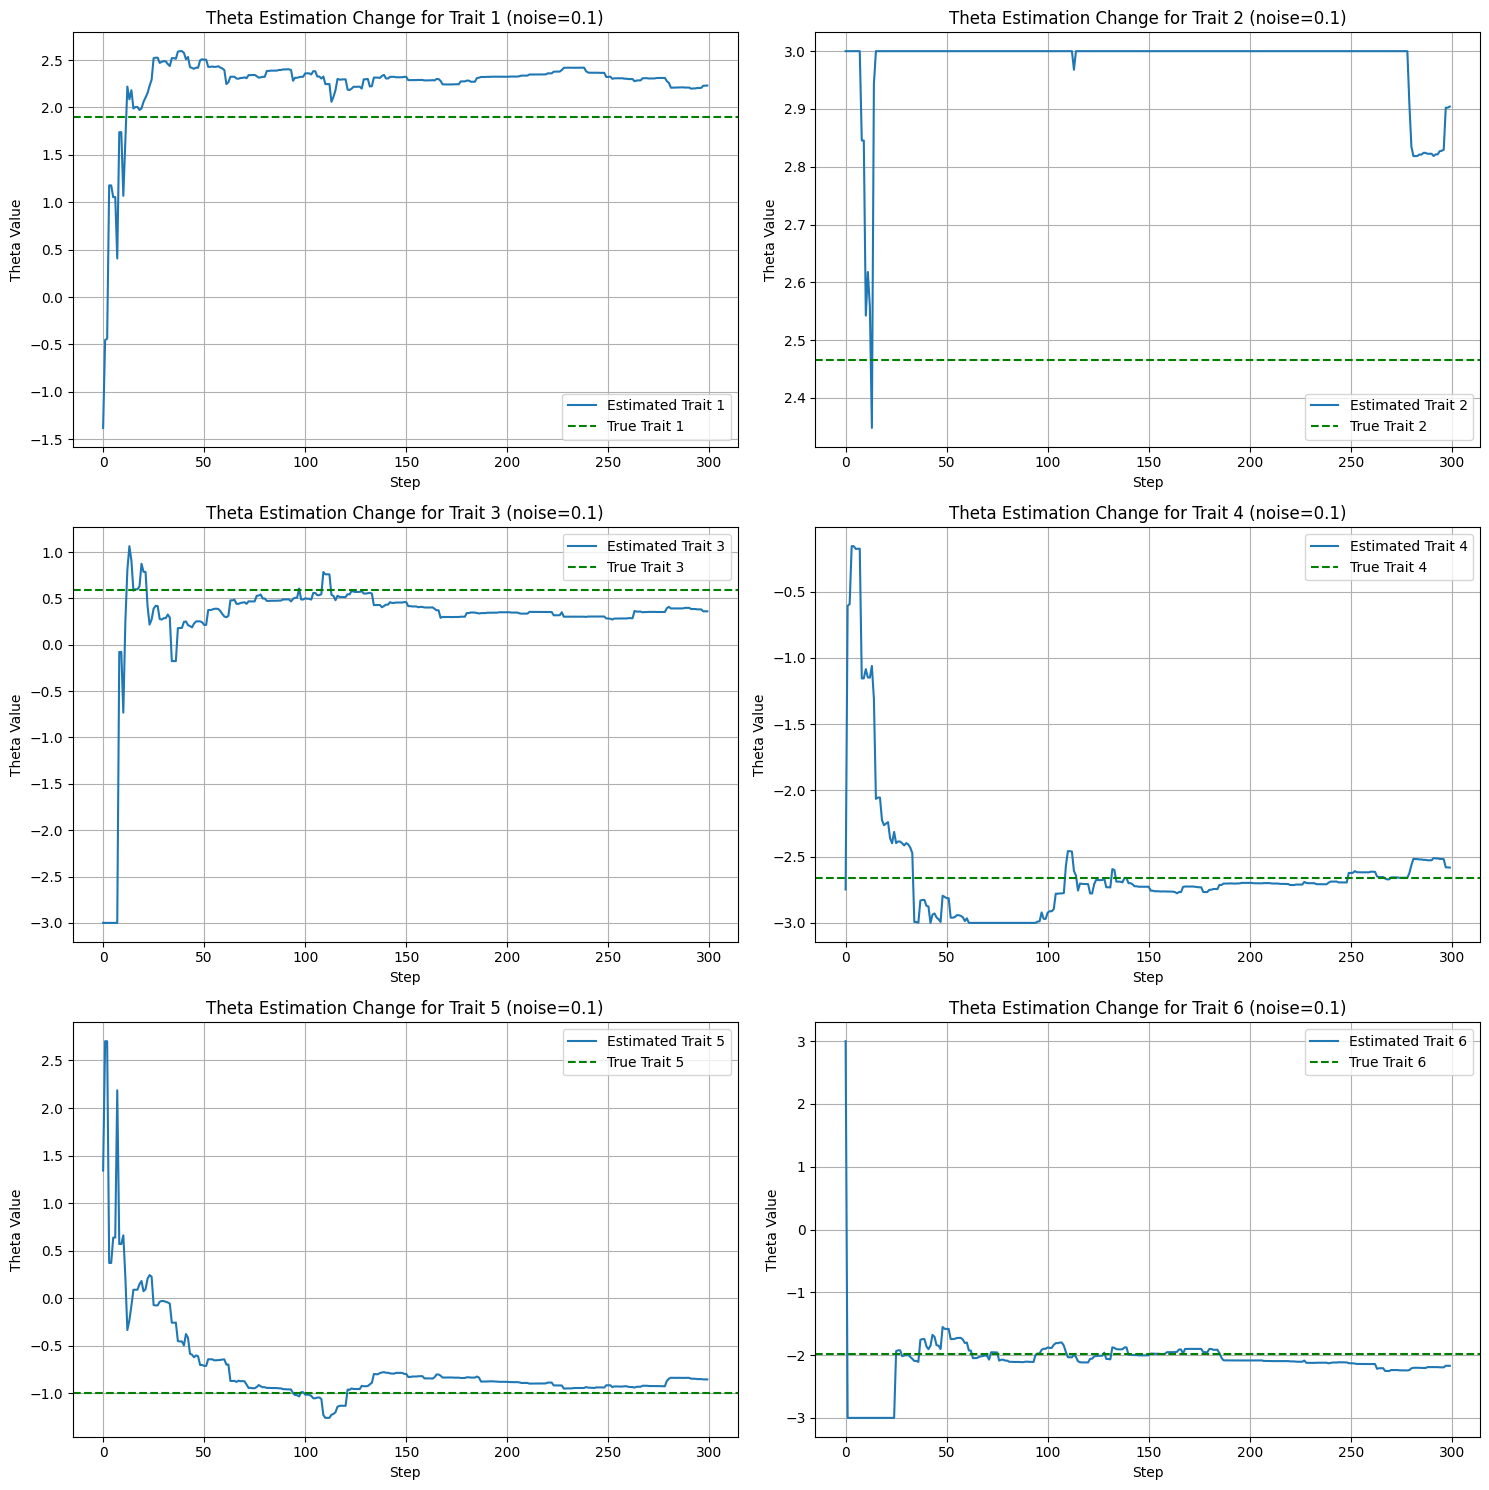

In [99]:
vanila.plot_results(save_fig=False)

In [21]:
import numpy as np

# Setup
n_items = 1000
probs = [0.4, 0.2, 0.2, 0.1, 0.1]
item_opts = ['likert', 'binary', 'value', 'mc_single', 'mc_multi']
item_types = np.random.choice(item_opts, size=n_items, p=probs)

# Subset of indices
x = np.random.randint(0, n_items, size=100)

# Dictionary to store the subset of x for each type
subset_x_by_type = {}

# Find the subset of x for each type


# Display the subset for each type
print("Subset of x by type:", subset_x_by_type)


Subset of x by type: {}


In [ ]:
# %%timeit
for item_type in item_opts:
    # Get indices in x where item_types is equal to item_type
    subset_x = x[item_types[x] == item_type]
    subset_x_by_type[item_type] = subset_x

In [ ]:
# %%timeit
subset_xs = [x[item_types[x] == item_opts[q]] for q in range(len(item_opts))]
subsex = [x[item_types[x] == item] for item in item_opts]

In [ ]:
subsex

In [ ]:
subset_xs

In [ ]:
subset_x_by_type

In [ ]:
import time
import numpy as np
from tqdm import tqdm
from model.IRT import AdaptiveMIRTv2

# Initialize AdaptiveMIRTv2 with test parameters
n_items = 1000    # Total number of items in the test pool
n_traits = 6      # Number of latent traits to estimate
n_steps = 100     # Number of adaptive testing steps
select_noise = 0.1  # Noise factor for item selection

# Instantiate the model
model = AdaptiveMIRTv2(select_noise=select_noise, n_items=n_items, n_traits=n_traits, verbose=False)

# Track timing for each adaptive step to observe performance improvements
iteration_times = []

# Run the adaptive testing loop
for step in tqdm(range(n_steps), desc="Running Optimized Adaptive Testing"):
    start_time = time.time()
    
    # Select the next item and simulate a response
    model.next_item()
    model.simulate_response()
    
    # Update theta estimates every 5 steps (for efficiency)
    if (step + 1) % 5 == 0:
        model.update_theta()
    
    # Record the elapsed time for this iteration
    iteration_times.append(time.time() - start_time)

# Plotting results using the class's plot_results method
model.plot_results(plot_info=True, plot_theta=True, no_show=False, save_fig=False)


Running Optimized Adaptive Testing:   3%|▎         | 3/100 [00:00<00:02, 35.22it/s]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [2]:
model.responses

[1, 1, 1, array([0, 1, 0, 1])]

In [20]:
xxx = [x[model2.item_types[x]== item] for item in model.item_opts]

NameError: name 'x' is not defined

In [59]:
likerts = x[model.item_types[x]=='likert']

In [74]:
lpb = model.scale_prob(model.a_params[likerts], model.true_th, model.thresholds[likerts].T)

In [76]:
dff = model.a_params[likerts] @ model.true_th


ValueError: object too deep for desired array

In [92]:
resp = [np.argmax(np.random.multinomial(1,p))+1 for p in lpb.T]

In [100]:
lpb.T[resp].shape

(35,)

In [99]:
model.a_params.shape

(1000, 6)

In [26]:
selected = np.asarray(model.sel_items, dtype=int)

# Create subsets of selected items by type
xy = [selected[model.item_types[selected] == item_type] for item_type in model.item_opts]

In [54]:
pb = model.bin_prob(model.a_params[xy[1]],model.bin_b[xy[1]], model.est_th)

In [56]:
fg*np.log(pb+1e-8)+(1-fg)*np.log(1-pb+1e-8)

array([-1.85855968])

In [48]:
model.est_th[xy[1]] 

IndexError: index 885 is out of bounds for axis 0 with size 6

In [50]:
fg = np.array(model.responses)
fg

array([0])

In [39]:
aa = np.random.rand(1000, 6)  # Replace with your actual data

# Array of indices b (e.g., length 10)
bb = np.array([1, 5, 10, 50, 100, 150, 200, 250, 300, 350])

# Select rows of a based on indices in b
cc = aa[bb]

In [40]:
cc

array([[0.06143074, 0.2314039 , 0.24448349, 0.79507677, 0.58579589,
        0.14635856],
       [0.63706055, 0.95330077, 0.56318102, 0.99397019, 0.44116   ,
        0.07690867],
       [0.2033581 , 0.83755831, 0.25325864, 0.05751636, 0.77024365,
        0.22954901],
       [0.93613209, 0.6314675 , 0.52434157, 0.50763124, 0.7505899 ,
        0.97916401],
       [0.76042547, 0.32611368, 0.41111049, 0.41301441, 0.39822741,
        0.47535965],
       [0.99553957, 0.24506018, 0.70935715, 0.05362686, 0.84446481,
        0.01807199],
       [0.33153047, 0.68362539, 0.24957518, 0.63290601, 0.81251857,
        0.8151278 ],
       [0.15298281, 0.26776474, 0.26999244, 0.00124209, 0.12328494,
        0.84348917],
       [0.64709582, 0.36054719, 0.8021187 , 0.70426311, 0.53422537,
        0.77529375],
       [0.24784509, 0.42136373, 0.04306088, 0.79759435, 0.13230902,
        0.91863845]])

In [ ]:
a_params = np.random.randn(n_items, 6)
bin_b = np.random.randn(n_items)
theta0 = np.random.uniform(-3, 3, size=6)

In [ ]:
from scipy.special import expit
def bin_prob(a, b, theta):
    return expit(a @ theta - b)

In [ ]:
resp = np.random.binomial(1, prob_list)
resp

In [ ]:
%%timeit
probs = []
ll = 0
resps = []
for i in subset_xs[0]:
    prob = bin_prob(a_params[i], bin_b[i], theta0)
    prob = np.clip(prob, 1e-8, 1 - 1e-8)
    probs.append(prob)
    resp = np.random.binomial(1, prob)
    resps.append(resp)
    ll += resp * np.log(prob) + (1-resp) * np.log(1-prob)   

In [ ]:
%%timeit
p = np.clip(bin_prob(a_params[subset_xs[0]], bin_b[subset_xs[0]], theta0), 1e-8, 1 - 1e-8)
r = np.random.binomial(1, p)
nll = 0
nll = np.sum(r*np.log(p) + (1-r)*np.log(1-p))

In [ ]:
nll==ll

In [ ]:
%%timeit
prob_list = np.clip(bin_prob(a_params[subset_xs[0]], bin_b[subset_xs[0]], theta0), 1e-8, 1 - 1e-8)

In [ ]:
resp_list = 

In [ ]:
# Sampling from GAN latent space after training
with torch.no_grad():
    z = torch.randn(16, 20)  # Latent space dimension is 20
    gan_generated_images = generator(z).view(-1, 28, 28).numpy()
